## Dados sobre as reclamações realizadas no site:

https://www.consumidor.gov.br/pages/principal/?1652964614719

- Dados referentes ao ano de 2021 (Janeiro até Dezembro)
- Dados referentes ao ano de 2022 (Janeiro até Dezembro)
- Dados referentes ao ano de 2023 (Janeiro até Dezembro)
- Dados referentes ao ano de 2024 (Janeiro até Junho)

### Bibliotecas Utilizadas:

In [1]:
# Imports

# Manipulaçao dos dados
import pandas as pd
import numpy as np

# Visualização dos dados 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter, MaxNLocator

# Ignore Warning(Avisos)
import warnings

warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x:'%.2f' % x)

### Carregando a base de dados:

In [2]:
# Carregando os dados já Pré-Processados
df_gov = pd.read_parquet('../Data/Data_for_clear/dfGov.gzip')

# Amostra
df_gov.head()

,Região,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Solicitação,Mes Finalização,Mes Nome Finalização,Dia Semana Finalização,Dia Semana Nome Finalização
0,NE,CE,Fortaleza,M,entre 31 a 40 anos,2021-01-05,0.00,Faculdade Unopar,Estabelecimentos de Ensino,Educação,Superior ( Graduação e Pós ),Atendimento / SAC,Má qualidade no atendimento (descortesia / des...,Loja física,S,N,Finalizada avaliada,Não Resolvida,1.00,1,1,Janeiro,1,Terça-Feira
1,S,RS,Horizontina,F,mais de 70 anos,2021-01-04,15.00,Itaú Consignado,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Crédito Consignado / Cartão de Crédito Consign...,Cobrança / Contestação,Cobrança por serviço/produto não contratado / ...,Não comprei / contratei,N,S,Finalizada não avaliada,Não Avaliada,1.00,1,1,Janeiro,0,Segunda-Feira
2,SE,SP,Caieiras,M,entre 21 a 30 anos,2021-01-06,15.00,Itauleasing,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Banco de Dados e Cadastros de Consumidores (SP...,Informação,"Dados pessoais ou financeiros consultados, col...",Não comprei / contratei,S,S,Finalizada não avaliada,Não Avaliada,1.00,1,1,Janeiro,2,Quarta-Feira
3,SE,SP,São Paulo,M,entre 21 a 30 anos,2021-01-01,13.00,Banco Santander Cartões,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Cartão de Crédito / Cartão de Débito / Cartão ...,Cobrança / Contestação,Cobrança por serviço/produto não contratado / ...,Não comprei / contratei,S,S,Finalizada não avaliada,Não Avaliada,1.00,1,1,Janeiro,4,Sexta-Feira
4,SE,RJ,Rio de Janeiro,F,entre 31 a 40 anos,2021-01-02,15.00,Itaucard,"Bancos, Financeiras e Administradoras de Cartão",Demais Serviços,"Programas de Fidelidade / Benefícios (pontos, ...",Contrato / Oferta,Oferta não cumprida / serviço não fornecido/ v...,Não comprei / contratei,S,S,Finalizada não avaliada,Não Avaliada,1.00,1,1,Janeiro,5,Sábado


### Informações do dataset

In [3]:
# Verificando o nome das colunas do DataFrame
df_gov.columns

Index(['Região', 'UF', 'Cidade', 'Sexo', 'Faixa Etária', 'Data Finalização',
       'Tempo Resposta', 'Nome Fantasia', 'Segmento de Mercado', 'Área',
       'Assunto', 'Grupo Problema', 'Problema', 'Como Comprou Contratou',
       'Procurou Empresa', 'Respondida', 'Situação', 'Avaliação Reclamação',
       'Nota do Consumidor', 'Solicitação', 'Mes Finalização',
       'Mes Nome Finalização', 'Dia Semana Finalização',
       'Dia Semana Nome Finalização'],
      dtype='object')

In [4]:
# Verificando a quantidade de linhas e colunas do DataFrame
df_gov.shape

(4666868, 24)

In [5]:
# Info do dataset
df_gov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4666868 entries, 0 to 4666867
Data columns (total 24 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   Região                       object        
 1   UF                           object        
 2   Cidade                       object        
 3   Sexo                         object        
 4   Faixa Etária                 object        
 5   Data Finalização             datetime64[ns]
 6   Tempo Resposta               float64       
 7   Nome Fantasia                object        
 8   Segmento de Mercado          object        
 9   Área                         object        
 10  Assunto                      object        
 11  Grupo Problema               object        
 12  Problema                     object        
 13  Como Comprou Contratou       object        
 14  Procurou Empresa             object        
 15  Respondida                   object        
 16  

In [6]:
# Descrição do dataset 
df_gov.describe()

,Tempo Resposta,Nota do Consumidor,Solicitação,Mes Finalização,Dia Semana Finalização
count,4666868.00,4666868.00,4666868.00,4666868.00,4666868.00
mean,6.46,2.66,1.00,6.02,2.33
std,341.12,1.76,0.00,3.44,1.68
min,-736876.00,1.00,1.00,1.00,0.00
25%,4.00,1.00,1.00,3.00,1.00
50%,7.00,2.00,1.00,6.00,2.00
75%,9.00,5.00,1.00,9.00,4.00
max,49.00,5.00,1.00,12.00,6.00


## Respondendo algumas Perguntas

In [7]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params, palette="Set2")

- 1 - Qual a Quantidade de Solicitações(Reclamações Respondidas e Não Respondidas)?

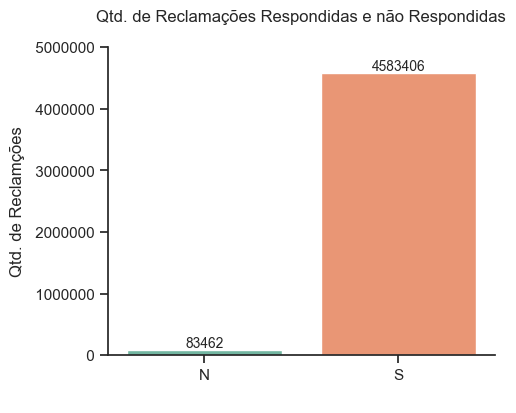

-----
Porcentagem de Reclamações:
Reclamações Respondidas: 98.21%
Reclamações Não Respondidas: 1.79%
-----


In [8]:
fig, ax = plt.subplots(figsize=(5,4))

splot = sns.countplot(x=df_gov['Respondida'])
for p in splot.patches:
    splot.annotate(format(int(p.get_height()), ''), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext = (0, 5), textcoords='offset points', size=10)

plt.title('Qtd. de Reclamações Respondidas e não Respondidas\n')
plt.xlabel(' ')
plt.ylabel('Qtd. de Reclamções')
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_major_formatter(FormatStrFormatter('% 1.0f'))
plt.ylim(0, 5000000)
plt.show()

rec_rec = df_gov['Respondida'].value_counts(normalize=True)
print('-----')
print('Porcentagem de Reclamações:')
print('Reclamações Respondidas: {:.2%}'.format(rec_rec[0]))
print('Reclamações Não Respondidas: {:.2%}'.format(rec_rec[1]))
print('-----')

- 2 - Qual A Quantidade de Solicitações(Reclamações) por Sexo?

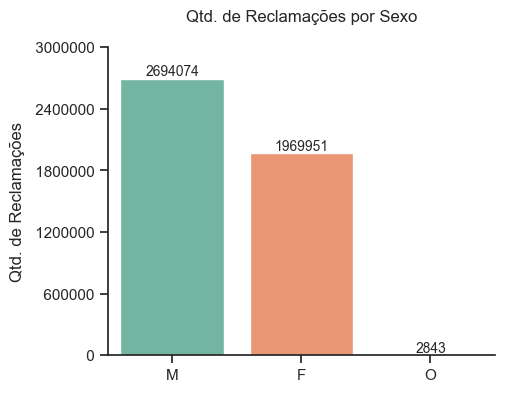

-----
Porcentagem de Reclamações por Sexo:
Reclamações Realiazadas(M): 57.73%
Reclamações Realiazadas(F): 42.21%
Reclamações Realiazadas(O): 0.06%
-----


In [9]:
fig, ax = plt.subplots(figsize=(5,4))

splot = sns.countplot(x=df_gov['Sexo'])
for p in splot.patches:
    splot.annotate(format(int(p.get_height()), ''), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext = (0, 5), textcoords = 'offset points', size=10)
    
plt.title('Qtd. de Reclamações por Sexo\n')
plt.xlabel(' ')
plt.ylabel('Qtd. de Reclamações')
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_major_formatter(FormatStrFormatter('% 1.0f'))
plt.ylim(0, 3000000)
plt.show()

rec_se = df_gov['Sexo'].value_counts(normalize=True)
print('-----')
print('Porcentagem de Reclamações por Sexo:')
print('Reclamações Realiazadas(M): {:.2%}'.format(rec_se[0]))
print('Reclamações Realiazadas(F): {:.2%}'.format(rec_se[1]))
print('Reclamações Realiazadas(O): {:.2%}'.format(rec_se[2]))
print('-----')

- 3 - Qual A Quandidade de Solicitações(Reclamações) por Região e Sexo?

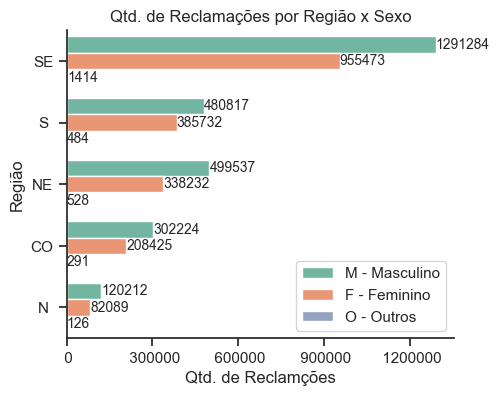

-----
Porcentagem de Reclamações por Região:
Reclamações Realizadas(SE): 48.17% 
Reclamações Realizadas(S): 18.58% 
Reclamações Realizadas(NE): 17.96% 
Reclamações Realizadas(CO): 10.95% 
Reclamações Realizadas(N): 4.34% 
-----


In [10]:
fig, ax = plt.subplots(figsize=(5,4))

splot = sns.countplot(y=df_gov['Região'], hue=df_gov['Sexo'], order=df_gov['Região'].value_counts().index)
for p in splot.patches:
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        splot.annotate(int(x), (x, y), size=10, va='center')

plt.title('Qtd. de Reclamações por Região x Sexo')
plt.xlabel('Qtd. de Reclamções')
plt.ylabel('Região')
plt.legend(labels=['M - Masculino', 'F - Feminino', 'O - Outros'], ncol=1)
ax.xaxis.set_major_locator(MaxNLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('% 1.0f'))
plt.show()

rec_uf = df_gov['Região'].value_counts(normalize=True)
print('-----')
print('Porcentagem de Reclamações por Região:')
print('Reclamações Realizadas(SE):\033[1;31m {:.2%} \033[0;0m'.format(rec_uf[0]))
print('Reclamações Realizadas(S):\033[1;31m {:.2%} \033[0;0m'.format(rec_uf[1]))
print('Reclamações Realizadas(NE):\033[1;31m {:.2%} \033[0;0m'.format(rec_uf[2]))
print('Reclamações Realizadas(CO):\033[1;31m {:.2%} \033[0;0m'.format(rec_uf[3]))
print('Reclamações Realizadas(N):\033[1;31m {:.2%} \033[0;0m'.format(rec_uf[4]))
print('-----')

- 4 - Qual A Quandidade de Solicitações(Reclamações) por UF?

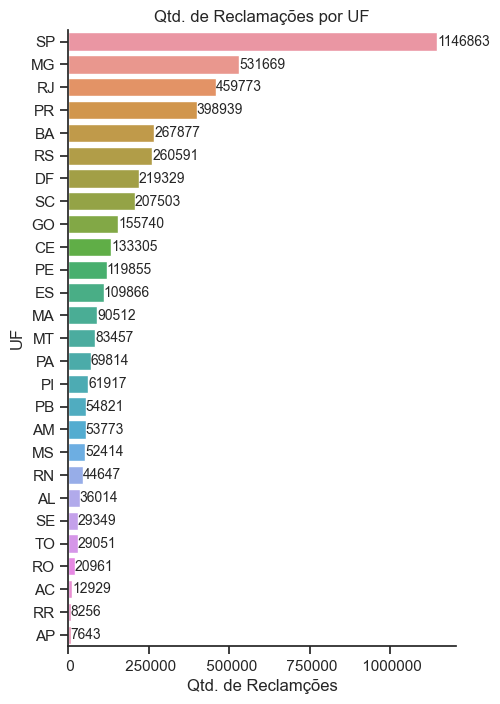

-----
Porcentagem de Reclamações por UF:
Reclamações realizadas - SP: 24.57% 
Reclamações realizadas - MG: 11.39% 
Reclamações realizadas - RJ: 9.85% 
Reclamações realizadas - PR: 8.55% 
Reclamações realizadas - BA: 5.74% 
Reclamações realizadas - RS: 5.58% 
Reclamações realizadas - DF: 4.70% 
Reclamações realizadas - SC: 4.45% 
Reclamações realizadas - GO: 3.34% 
Reclamações realizadas - CE: 2.86% 
Reclamações realizadas - PE: 2.57% 
Reclamações realizadas - ES: 2.35% 
Reclamações realizadas - MA: 1.94% 
Reclamações realizadas - MT: 1.79% 
Reclamações realizadas - PA: 1.50% 
Reclamações realizadas - PI: 1.33% 
Reclamações realizadas - PB: 1.17% 
Reclamações realizadas - AM: 1.15% 
Reclamações realizadas - MS: 1.12% 
Reclamações realizadas - RN: 0.96% 
Reclamações realizadas - AL: 0.77% 
Reclamações realizadas - SE: 0.63% 
Reclamações realizadas - TO: 0.62% 
Reclamações realizadas - RO: 0.45% 
Reclamações realizadas - AC: 0.28% 
Reclamações realizadas - RR: 0.18% 
Reclamações realizada

In [11]:
fig, ax = plt.subplots(figsize=(5,8))

splot = sns.countplot(y=df_gov['UF'], order=df_gov['UF'].value_counts().index)
for p in splot.patches:
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        splot.annotate(int(x), (x, y), size=10, va='center')

plt.title('Qtd. de Reclamações por UF')
plt.xlabel('Qtd. de Reclamções')
plt.ylabel('UF')
ax.xaxis.set_major_locator(MaxNLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('% 1.0f'))
plt.show()

uf_nor = df_gov['UF'].value_counts(normalize=True)
uf_nor = pd.DataFrame(uf_nor)
uf_nor.reset_index(inplace=True)
uf_nor.rename(columns=({'index':'UF','UF':'Qtd. de Reclamações'}), inplace=True)

j = 0
print('-----')
print('Porcentagem de Reclamações por UF:')
for i in uf_nor['UF']:
        print('Reclamações realizadas - {}:\033[1;31m {:.2%} \033[0;0m'.format(i,uf_nor['Qtd. de Reclamações'][j]))
        j = j + 1  
print('-----')

- 5 - Qual A Quandidade de Solicitações(Reclamações) por Faixa Etária?

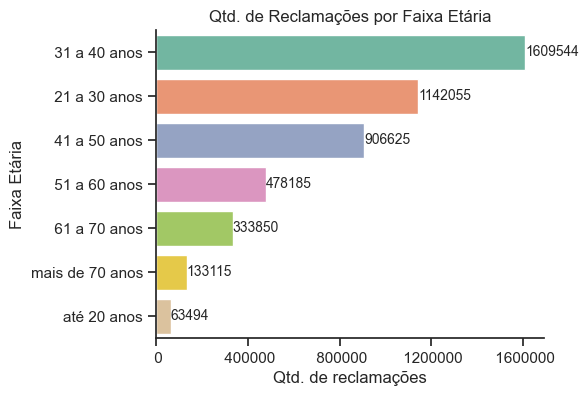

-----
Porcentagem de Reclamações por Faixa Etária:
Reclamações Realizadas - Entre 31 a 40 Anos: 34.49% 
Reclamações Realizadas - Entre 21 a 30 Anos: 24.47% 
Reclamações Realizadas - Entre 41 a 50 Anos: 19.43% 
Reclamações Realizadas - Entre 51 a 60 Anos: 10.25% 
Reclamações Realizadas - Entre 61 a 70 Anos: 7.15% 
Reclamações Realizadas - Mais de 70 Anos: 2.85% 
Reclamações Realizadas - Até 20 Anos: 1.36% 
-----


In [12]:
df_gov['Faixa Etária'] = df_gov['Faixa Etária'].str.replace('entre','', regex=True) 

fig, ax = plt.subplots(figsize=(5,4))

splot = sns.countplot(y=df_gov['Faixa Etária'], order=df_gov['Faixa Etária'].value_counts().index)
for p in splot.patches:
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        splot.annotate(int(x), (x, y), size=10, va='center')

plt.title('Qtd. de Reclamações por Faixa Etária')
plt.xlabel('Qtd. de reclamações')
plt.ylabel('Faixa Etária')
ax.xaxis.set_major_locator(MaxNLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('% 1.0f'))
plt.show()

rec_fe = df_gov['Faixa Etária'].value_counts(normalize=True)
print('-----')
print('Porcentagem de Reclamações por Faixa Etária:')
print('Reclamações Realizadas - Entre 31 a 40 Anos:\033[1;31m {:.2%} \033[0;0m'.format(rec_fe[0]))
print('Reclamações Realizadas - Entre 21 a 30 Anos:\033[1;31m {:.2%} \033[0;0m'.format(rec_fe[1]))
print('Reclamações Realizadas - Entre 41 a 50 Anos:\033[1;31m {:.2%} \033[0;0m'.format(rec_fe[2]))
print('Reclamações Realizadas - Entre 51 a 60 Anos:\033[1;31m {:.2%} \033[0;0m'.format(rec_fe[3]))
print('Reclamações Realizadas - Entre 61 a 70 Anos:\033[1;31m {:.2%} \033[0;0m'.format(rec_fe[4]))
print('Reclamações Realizadas - Mais de 70 Anos:\033[1;31m {:.2%} \033[0;0m'.format(rec_fe[5]))
print('Reclamações Realizadas - Até 20 Anos:\033[1;31m {:.2%} \033[0;0m'.format(rec_fe[6]))
print('-----')

- 6 - Qual A Quandidade de Solicitações(Reclamações) por Faixa Etária e Sexo?

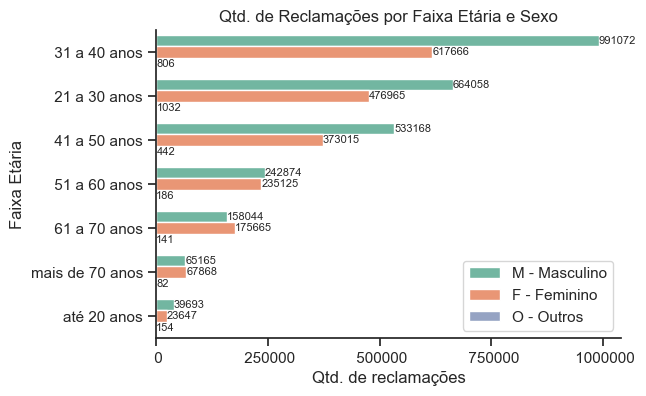

In [13]:
df_gov['Faixa Etária'] = df_gov['Faixa Etária'].str.replace('entre','', regex=True) 

fig, ax = plt.subplots(figsize=(6,4))

splot = sns.countplot(y=df_gov['Faixa Etária'], hue=df_gov['Sexo'], order=df_gov['Faixa Etária'].value_counts().index)
for p in splot.patches:
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        splot.annotate(int(x), (x, y), size=8, va='center')

plt.title('Qtd. de Reclamações por Faixa Etária e Sexo')
plt.xlabel('Qtd. de reclamações')
plt.ylabel('Faixa Etária')
plt.legend(labels=['M - Masculino', 'F - Feminino', 'O - Outros'], ncol=1)
ax.xaxis.set_major_locator(MaxNLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('% 1.0f'))
plt.show()

- 7 - Qual A Quandidade de Solicitações(Reclamações) por Mês?

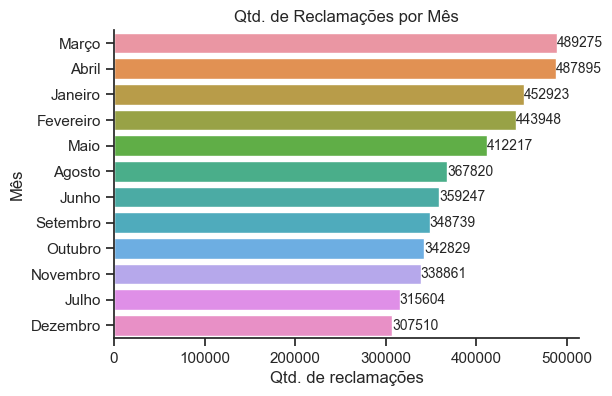

-----
Porcentagem de Reclamações Mês:
Reclamações realizadas - Março: 10.48% 
Reclamações realizadas - Abril: 10.45% 
Reclamações realizadas - Janeiro: 9.71% 
Reclamações realizadas - Fevereiro: 9.51% 
Reclamações realizadas - Maio: 8.83% 
Reclamações realizadas - Agosto: 7.88% 
Reclamações realizadas - Junho: 7.70% 
Reclamações realizadas - Setembro: 7.47% 
Reclamações realizadas - Outubro: 7.35% 
Reclamações realizadas - Novembro: 7.26% 
Reclamações realizadas - Julho: 6.76% 
Reclamações realizadas - Dezembro: 6.59% 
-----


In [14]:
plt.figure(figsize=(6,4))

splot = sns.countplot(y=df_gov['Mes Nome Finalização'], order=df_gov['Mes Nome Finalização'].value_counts().index)
for p in splot.patches:
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        splot.annotate(int(x), (x, y), size=10, va='center')

plt.title('Qtd. de Reclamações por Mês')
plt.xlabel('Qtd. de reclamações')
plt.ylabel('Mês')
plt.show()   

mes_nor = df_gov['Mes Nome Finalização'].value_counts(normalize=True)
mes_nor = pd.DataFrame(mes_nor)
mes_nor.reset_index(inplace=True)
mes_nor.rename(columns=({'index':'Mes Nome Finalização','Mes Nome Finalização':'Qtd. de Reclamações'}), inplace=True)

j = 0
print('-----')
print('Porcentagem de Reclamações Mês:')
for i in mes_nor['Mes Nome Finalização']:
        print('Reclamações realizadas - {}:\033[1;31m {:.2%} \033[0;0m'.format(i,mes_nor['Qtd. de Reclamações'][j]))
        j = j + 1   
print('-----')

- 8 - Qual A Quandidade de Solicitações(Reclamações) por Mês e Sexo?

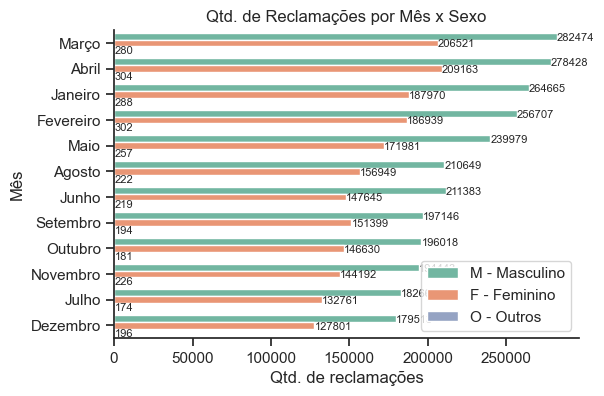

In [15]:
plt.figure(figsize=(6,4))

splot = sns.countplot(y=df_gov['Mes Nome Finalização'], hue=df_gov['Sexo'], order=df_gov['Mes Nome Finalização'].value_counts().index)
for p in splot.patches:
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/1.5
        splot.annotate(int(x), (x, y), size=8, va='center')

plt.title('Qtd. de Reclamações por Mês x Sexo')
plt.xlabel('Qtd. de reclamações')
plt.ylabel('Mês')
plt.legend(labels=['M - Masculino', 'F - Feminino', 'O - Outros'], ncol=1)
plt.show() 

- 7 - Qual A Quandidade de Solicitações(Reclamações) por dia da semana?

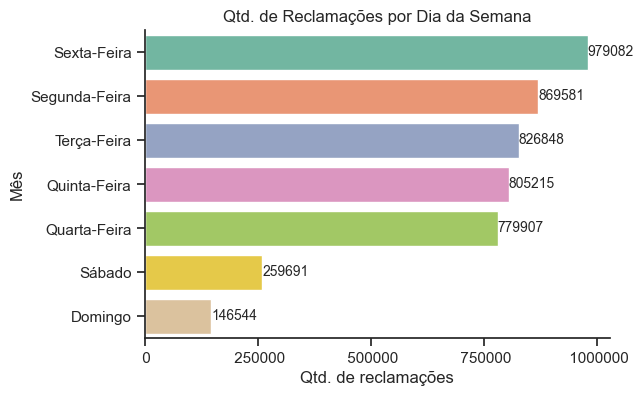

-----
Porcentagem de Reclamações Mês:
Reclamações realizadas - Sexta-Feira: 20.98% 
Reclamações realizadas - Segunda-Feira: 18.63% 
Reclamações realizadas - Terça-Feira: 17.72% 
Reclamações realizadas - Quinta-Feira: 17.25% 
Reclamações realizadas - Quarta-Feira: 16.71% 
Reclamações realizadas - Sábado: 5.56% 
Reclamações realizadas - Domingo: 3.14% 
-----


In [16]:
fig, ax = plt.subplots(figsize=(6,4))

splot = sns.countplot(y=df_gov['Dia Semana Nome Finalização'], order=df_gov['Dia Semana Nome Finalização'].value_counts().index)
for p in splot.patches:
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        splot.annotate(int(x), (x, y), size=10, va='center')

plt.title('Qtd. de Reclamações por Dia da Semana')
plt.xlabel('Qtd. de reclamações')
plt.ylabel('Mês')
ax.xaxis.set_major_locator(MaxNLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('% 1.0f'))
plt.show()   

mes_nor = df_gov['Dia Semana Nome Finalização'].value_counts(normalize=True)
mes_nor = pd.DataFrame(mes_nor)
mes_nor.reset_index(inplace=True)
mes_nor.rename(columns=({'index':'Dia Semana Nome Finalização','Dia Semana Nome Finalização':'Qtd. de Reclamações'}), inplace=True)

j = 0
print('-----')
print('Porcentagem de Reclamações Mês:')
for i in mes_nor['Dia Semana Nome Finalização']:
        print('Reclamações realizadas - {}:\033[1;31m {:.2%} \033[0;0m'.format(i,mes_nor['Qtd. de Reclamações'][j]))
        j = j + 1  
print('-----')

- 8 - Qual a quantidade de solicitações(Reclamações) por Nome Fantasia(Empresa)

> 20 primeiros com mais solicitações(Reclamações)

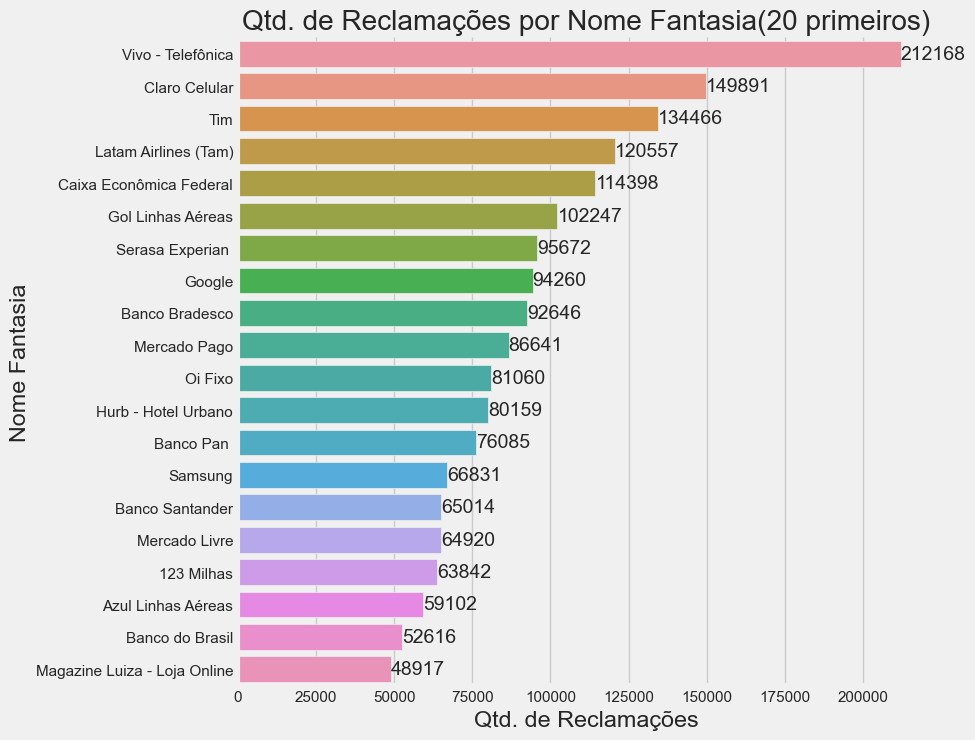

Reclamações realizadas - Vivo - Telefônica: 4.55% 
Reclamações realizadas - Claro Celular: 3.21% 
Reclamações realizadas - Tim: 2.88% 
Reclamações realizadas - Latam Airlines (Tam): 2.58% 
Reclamações realizadas - Caixa Econômica Federal: 2.45% 
Reclamações realizadas - Gol Linhas Aéreas: 2.19% 
Reclamações realizadas - Serasa Experian : 2.05% 
Reclamações realizadas - Google: 2.02% 
Reclamações realizadas - Banco Bradesco: 1.99% 
Reclamações realizadas - Mercado Pago: 1.86% 
Reclamações realizadas - Oi Fixo: 1.74% 
Reclamações realizadas - Hurb - Hotel Urbano: 1.72% 
Reclamações realizadas - Banco Pan : 1.63% 
Reclamações realizadas - Samsung: 1.43% 
Reclamações realizadas - Banco Santander: 1.39% 
Reclamações realizadas - Mercado Livre: 1.39% 
Reclamações realizadas - 123 Milhas: 1.37% 
Reclamações realizadas - Azul Linhas Aéreas: 1.27% 
Reclamações realizadas - Banco do Brasil: 1.13% 
Reclamações realizadas - Magazine Luiza - Loja Online: 1.05% 


In [17]:
fant = df_gov['Nome Fantasia'].value_counts()
pd.DataFrame(fant)
fant2 = fant[0:20]
fant2 = pd.DataFrame(fant2)

fant2.reset_index(inplace=True)
fant2.rename(columns=({'index':'Nome Fantasia','Nome Fantasia':'Qtd. de Reclamações'}), inplace=True)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,8))

splot = sns.barplot(x=fant2['Qtd. de Reclamações'], y=fant2['Nome Fantasia'])
for p in splot.patches:
        x = p.get_x() + p.get_width() 
        y = p.get_y() + p.get_height()/2
        splot.annotate(int(x),(x, y), size=14, va='center')  
        
plt.title('Qtd. de Reclamações por Nome Fantasia(20 primeiros)')         
plt.show()        
        
fant_nor = df_gov['Nome Fantasia'].value_counts(normalize=True)
fant_nor = pd.DataFrame(fant_nor)
fant_nor.reset_index(inplace=True)
fant_nor.rename(columns=({'index':'Nome Fantasia','Nome Fantasia':'Qtd. de Reclamações'}), inplace=True)

fant_nor = fant_nor[0:20]

j = 0
for i in fant_nor['Nome Fantasia']:
        print('Reclamações realizadas - {}:\033[1;31m {:.2%} \033[0;0m'.format(i,fant_nor['Qtd. de Reclamações'][j]))
        j = j + 1  

- 9 - Qual a quantidade de solicitações(Reclamações) por Segmento de Mercado

> 20 primeirod com mais solicitações(Reclamações)

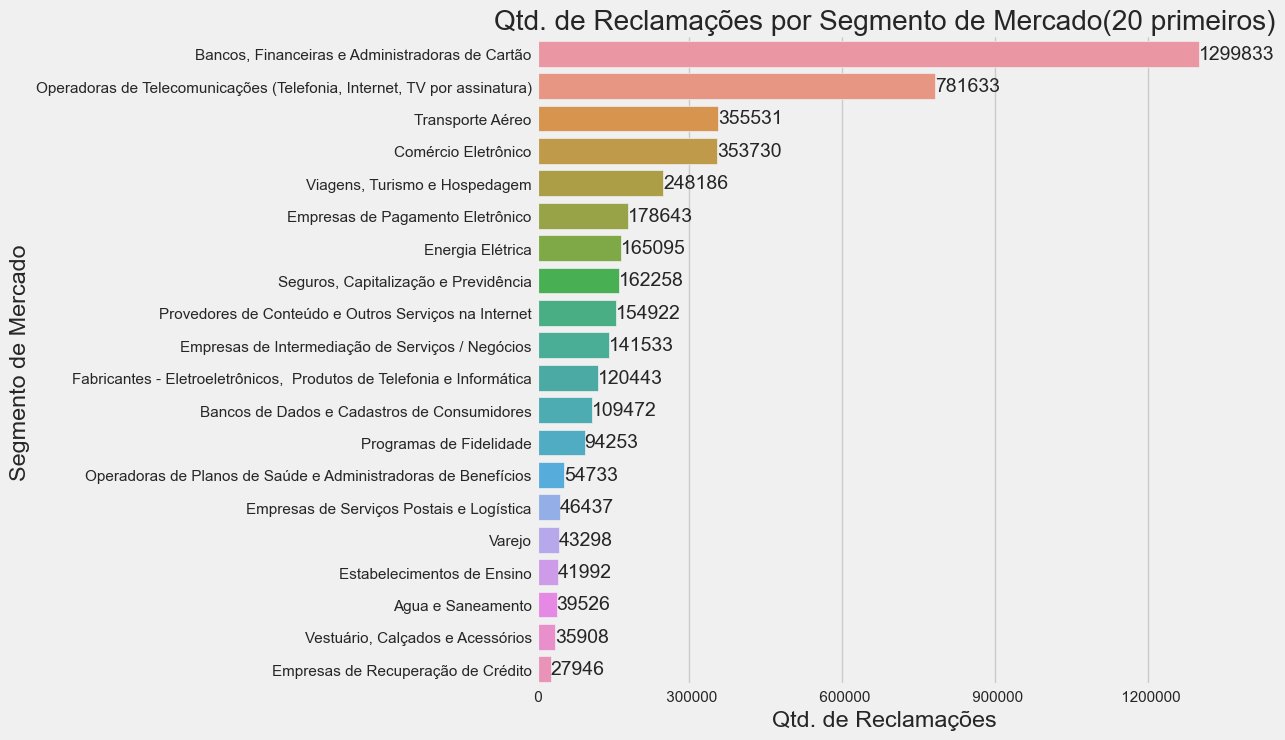

Reclamações realizadas - Bancos, Financeiras e Administradoras de Cartão: 27.85% 
Reclamações realizadas - Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura): 16.75% 
Reclamações realizadas - Transporte Aéreo: 7.62% 
Reclamações realizadas - Comércio Eletrônico: 7.58% 
Reclamações realizadas - Viagens, Turismo e Hospedagem: 5.32% 
Reclamações realizadas - Empresas de Pagamento Eletrônico: 3.83% 
Reclamações realizadas - Energia Elétrica: 3.54% 
Reclamações realizadas - Seguros, Capitalização e Previdência: 3.48% 
Reclamações realizadas - Provedores de Conteúdo e Outros Serviços na Internet: 3.32% 
Reclamações realizadas - Empresas de Intermediação de Serviços / Negócios: 3.03% 
Reclamações realizadas - Fabricantes - Eletroeletrônicos,  Produtos de Telefonia e Informática: 2.58% 
Reclamações realizadas - Bancos de Dados e Cadastros de Consumidores: 2.35% 
Reclamações realizadas - Programas de Fidelidade: 2.02% 
Reclamações realizadas - Operadoras de Planos de Saúde 

In [18]:
seg_merc = df_gov['Segmento de Mercado'].value_counts()
pd.DataFrame(seg_merc)
seg_merc2 = seg_merc[0:20]
seg_merc2 = pd.DataFrame(seg_merc2)

seg_merc2.reset_index(inplace=True)
seg_merc2.rename(columns=({'index':'Segmento de Mercado','Segmento de Mercado':'Qtd. de Reclamações'}), inplace=True)

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(8,8))

splot = sns.barplot(x=seg_merc2['Qtd. de Reclamações'], y=seg_merc2['Segmento de Mercado'])
for p in splot.patches:
        x = p.get_x() + p.get_width() 
        y = p.get_y() + p.get_height()/2
        splot.annotate(int(x),(x, y), size=14, va='center')  
        
plt.title('Qtd. de Reclamações por Segmento de Mercado(20 primeiros)')
ax.xaxis.set_major_locator(MaxNLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('% 1.0f'))         
plt.show()        
        
seg_nor = df_gov['Segmento de Mercado'].value_counts(normalize=True)
seg_nor = pd.DataFrame(seg_nor)
seg_nor.reset_index(inplace=True)
seg_nor.rename(columns=({'index':'Segmento de Mercado','Segmento de Mercado':'Qtd. de Reclamações'}), inplace=True)

seg_nor = seg_nor[0:20]

j = 0
for i in seg_nor['Segmento de Mercado']:
        print('Reclamações realizadas - {}:\033[1;31m {:.2%} \033[0;0m'.format(i,seg_nor['Qtd. de Reclamações'][j]))
        j = j + 1 

- 10 - Qual a quantidade de solicitações(Reclamações) por Problema

> 20 primeiros com mais solicitações(Reclamações)

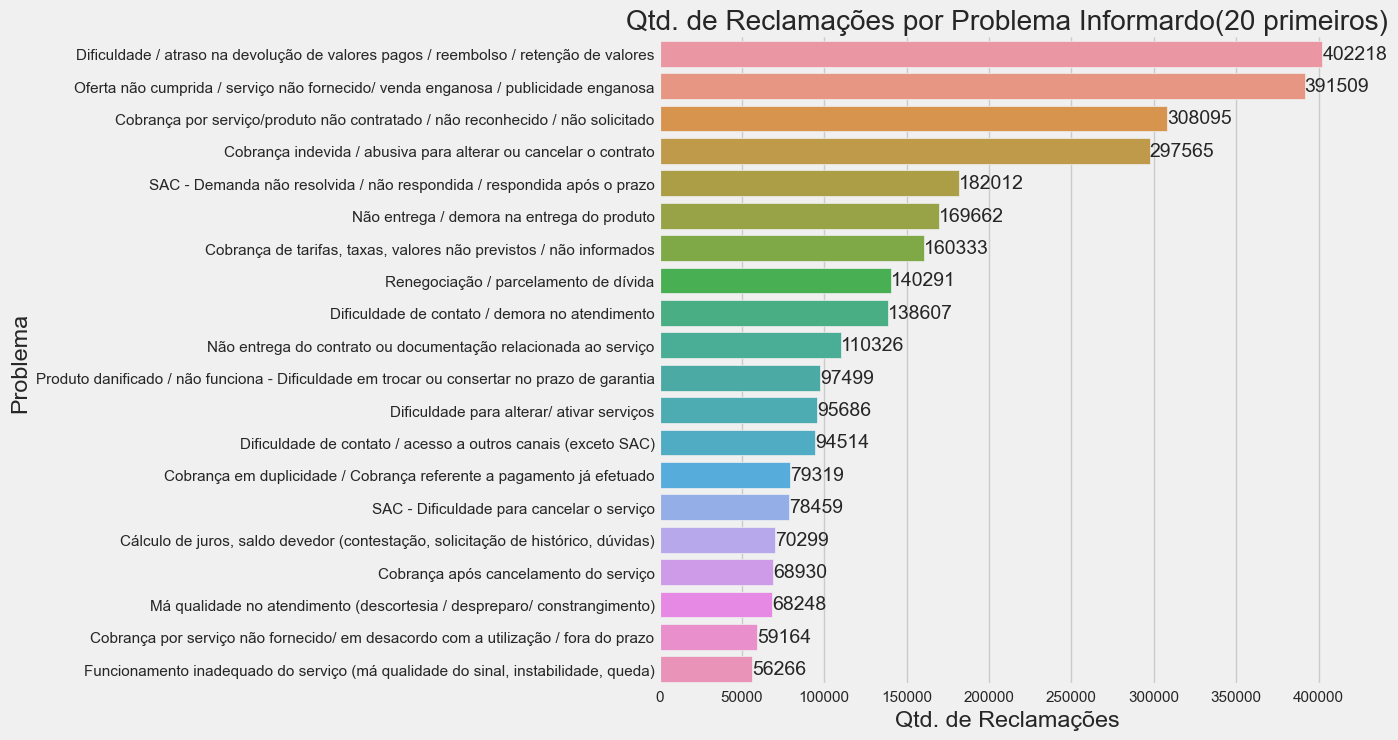

Reclamações realizadas - Dificuldade / atraso na devolução de valores pagos / reembolso / retenção de valores: 8.62% 
Reclamações realizadas - Oferta não cumprida / serviço não fornecido/ venda enganosa / publicidade enganosa: 8.39% 
Reclamações realizadas - Cobrança por serviço/produto não contratado / não reconhecido / não solicitado: 6.60% 
Reclamações realizadas - Cobrança indevida / abusiva para alterar ou cancelar o contrato: 6.38% 
Reclamações realizadas - SAC - Demanda não resolvida / não respondida / respondida após o prazo: 3.90% 
Reclamações realizadas - Não entrega / demora na entrega do produto: 3.64% 
Reclamações realizadas - Cobrança de tarifas, taxas, valores não previstos / não informados: 3.44% 
Reclamações realizadas - Renegociação / parcelamento de dívida: 3.01% 
Reclamações realizadas - Dificuldade de contato / demora no atendimento: 2.97% 
Reclamações realizadas - Não entrega do contrato ou documentação relacionada ao serviço: 2.36% 
Reclamações realizadas - Produ

In [19]:
probl = df_gov['Problema'].value_counts()
pd.DataFrame(probl)
probl2 = probl[0:20]
probl2 = pd.DataFrame(probl2)

probl2.reset_index(inplace=True)
probl2.rename(columns=({'index':'Problema','Problema':'Qtd. de Reclamações'}), inplace=True)
probl2.head()

plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,8))

splot = sns.barplot(x=probl2['Qtd. de Reclamações'], y=probl2['Problema'])
for p in splot.patches:
        x = p.get_x() + p.get_width() 
        y = p.get_y() + p.get_height()/2
        splot.annotate(int(x),(x, y), size=14, va='center')  
        
plt.title('Qtd. de Reclamações por Problema Informardo(20 primeiros)')         
plt.show()        
        
probl_nor = df_gov['Problema'].value_counts(normalize=True)
probl_nor = pd.DataFrame(probl_nor)
probl_nor.reset_index(inplace=True)
probl_nor.rename(columns=({'index':'Problema','Problema':'Qtd. de Reclamações'}), inplace=True)

probl_nor = probl_nor[0:20]

j = 0
for i in probl_nor['Problema']:
        print('Reclamações realizadas - {}:\033[1;31m {:.2%} \033[0;0m'.format(i,probl_nor['Qtd. de Reclamações'][j]))
        j = j + 1  

- 11 - Qual a quantidade de solicitações(Reclamações) por Área

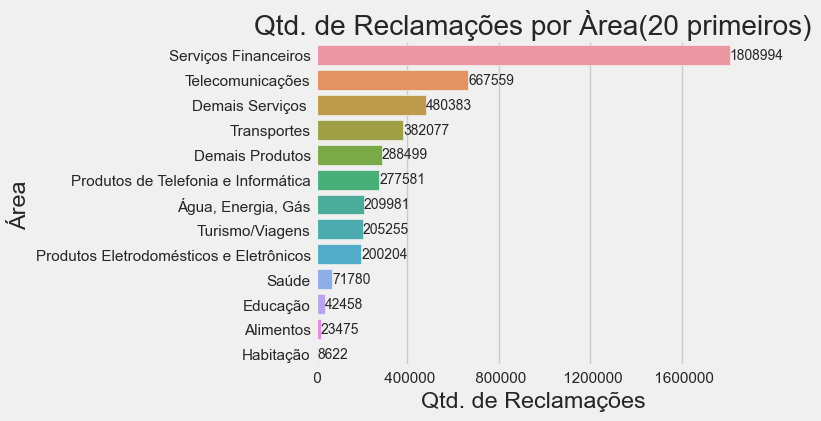

Reclamações realizadas - Serviços Financeiros: 38.76% 
Reclamações realizadas - Telecomunicações: 14.30% 
Reclamações realizadas - Demais Serviços : 10.29% 
Reclamações realizadas - Transportes: 8.19% 
Reclamações realizadas - Demais Produtos: 6.18% 
Reclamações realizadas - Produtos de Telefonia e Informática: 5.95% 
Reclamações realizadas - Água, Energia, Gás: 4.50% 
Reclamações realizadas - Turismo/Viagens: 4.40% 
Reclamações realizadas - Produtos Eletrodomésticos e Eletrônicos: 4.29% 
Reclamações realizadas - Saúde: 1.54% 
Reclamações realizadas - Educação: 0.91% 
Reclamações realizadas - Alimentos: 0.50% 
Reclamações realizadas - Habitação: 0.18% 


In [20]:
seg_area = df_gov['Área'].value_counts()
pd.DataFrame(seg_area)
seg_area2 = seg_area[0:20]
seg_area2 = pd.DataFrame(seg_area2)

seg_area2.reset_index(inplace=True)
seg_area2.rename(columns=({'index':'Área','Área':'Qtd. de Reclamações'}), inplace=True)

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(5,4))

splot = sns.barplot(x=seg_area2['Qtd. de Reclamações'], y=seg_area2['Área'])
for p in splot.patches:
        x = p.get_x() + p.get_width() 
        y = p.get_y() + p.get_height()/2
        splot.annotate(int(x),(x, y), size=10, va='center')  
        
plt.title('Qtd. de Reclamações por Àrea(20 primeiros)')
ax.xaxis.set_major_locator(MaxNLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('% 1.0f'))         
plt.show()        
        
seg_nor_area = df_gov['Área'].value_counts(normalize=True)
seg_nor_area = pd.DataFrame(seg_nor_area)
seg_nor_area.reset_index(inplace=True)
seg_nor_area.rename(columns=({'index':'Área','Área':'Qtd. de Reclamações'}), inplace=True)

seg_nor_area = seg_nor_area[0:20]

j = 0
for i in seg_nor_area['Área']:
        print('Reclamações realizadas - {}:\033[1;31m {:.2%} \033[0;0m'.format(i,seg_nor_area['Qtd. de Reclamações'][j]))
        j = j + 1 

- 11 - Qual a quantidade de solicitações(Reclamações) de como Comprou/Contratou

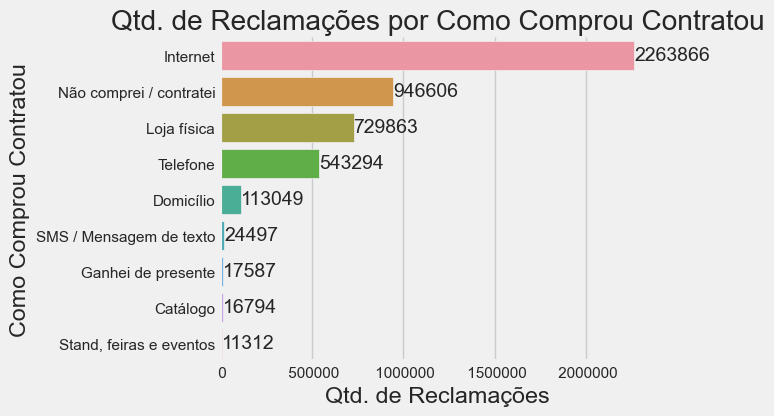

Reclamações realizadas - Internet: 48.51% 
Reclamações realizadas - Não comprei / contratei: 20.28% 
Reclamações realizadas - Loja física: 15.64% 
Reclamações realizadas - Telefone: 11.64% 
Reclamações realizadas - Domicílio: 2.42% 
Reclamações realizadas - SMS / Mensagem de texto: 0.52% 
Reclamações realizadas - Ganhei de presente: 0.38% 
Reclamações realizadas - Catálogo: 0.36% 
Reclamações realizadas - Stand, feiras e eventos: 0.24% 


In [21]:
comp = df_gov['Como Comprou Contratou'].value_counts()
comp = pd.DataFrame(comp)

comp.reset_index(inplace=True)
comp.rename(columns=({'index':'Como Comprou Contratou','Como Comprou Contratou':'Qtd. de Reclamações'}), inplace=True)

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(5,4))

splot = sns.barplot(x=comp['Qtd. de Reclamações'], y=comp['Como Comprou Contratou'])
for p in splot.patches:
        x = p.get_x() + p.get_width() 
        y = p.get_y() + p.get_height()/2
        splot.annotate(int(x),(x, y), size=14, va='center')  
        
plt.title('Qtd. de Reclamações por Como Comprou Contratou')
ax.xaxis.set_major_locator(MaxNLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('% 1.0f'))        
plt.show()        
        
com_nor = df_gov['Como Comprou Contratou'].value_counts(normalize=True)
com_nor = pd.DataFrame(com_nor)
com_nor.reset_index(inplace=True)
com_nor.rename(columns=({'index':'Como Comprou Contratou','Como Comprou Contratou':'Qtd. de Reclamações'}), inplace=True)

j = 0
for i in com_nor['Como Comprou Contratou']:
        print('Reclamações realizadas - {}:\033[1;31m {:.2%} \033[0;0m'.format(i,com_nor['Qtd. de Reclamações'][j]))
        j = j + 1 

- 12 - Verificando a Quantidade de reclamações por 'Segmento de Mercado','Problema','Como Comprou Contratou'

> 20 primeiros com mais solicitações(Reclamações)

In [22]:
order_p1 = df_gov.groupby(['Segmento de Mercado','Problema','Como Comprou Contratou'])['Solicitação'].agg(['count']).rename(columns={'count':'Total Reclamações'})

temp_df_p1 = order_p1.sort_values('Total Reclamações', ascending=False).reset_index()
temp_df_p1['%'] = round((temp_df_p1['Total Reclamações'].loc[:] / len(df_gov)) * 100,2)

temp_df_p1 = temp_df_p1[0:20]

temp_df_p1.head(20)

,Segmento de Mercado,Problema,Como Comprou Contratou,Total Reclamações,%
0,"Bancos, Financeiras e Administradoras de Cartão",Cobrança por serviço/produto não contratado / ...,Não comprei / contratei,95611,2.05
1,"Viagens, Turismo e Hospedagem",Dificuldade / atraso na devolução de valores p...,Internet,88558,1.90
2,Comércio Eletrônico,Não entrega / demora na entrega do produto,Internet,76184,1.63
3,Comércio Eletrônico,Oferta não cumprida / serviço não fornecido/ v...,Internet,73721,1.58
4,Transporte Aéreo,Dificuldade / atraso na devolução de valores p...,Internet,64803,1.39
5,Comércio Eletrônico,Dificuldade / atraso na devolução de valores p...,Internet,60544,1.30
6,"Viagens, Turismo e Hospedagem",Oferta não cumprida / serviço não fornecido/ v...,Internet,54061,1.16
7,Provedores de Conteúdo e Outros Serviços na In...,Dificuldade para alterar/ ativar serviços,Internet,48820,1.05
8,"Operadoras de Telecomunicações (Telefonia, Int...",Cobrança por serviço/produto não contratado / ...,Não comprei / contratei,46916,1.01
9,"Bancos, Financeiras e Administradoras de Cartão",Não entrega do contrato ou documentação relaci...,Loja física,45746,0.98


- 13 - Verificando a Quantidade de reclamações por 'Nome Fantasia','Problema','Como Comprou Contratou'

> 20 primeiros com mais solicitações(Reclamações)

In [23]:
order_p2 = df_gov.groupby(['Nome Fantasia','Problema','Como Comprou Contratou'])['Solicitação'].agg(['count']).rename(columns={'count':'Total Reclamações'})

temp_df_p2 = order_p2.sort_values('Total Reclamações', ascending=False).reset_index()
temp_df_p2 = temp_df_p2[0:20]

temp_df_p2['%'] = round((temp_df_p2['Total Reclamações'].loc[:] / len(df_gov)) * 100,2)

temp_df_p2.head(20)

,Nome Fantasia,Problema,Como Comprou Contratou,Total Reclamações,%
0,Google,Dificuldade para alterar/ ativar serviços,Internet,45980,0.99
1,Hurb - Hotel Urbano,Dificuldade / atraso na devolução de valores p...,Internet,37413,0.80
2,Hurb - Hotel Urbano,Oferta não cumprida / serviço não fornecido/ v...,Internet,26118,0.56
3,Correios,Não entrega / demora na entrega do produto,Internet,23846,0.51
4,Serasa Experian,"Dados pessoais ou financeiros consultados, col...",Não comprei / contratei,22995,0.49
5,123 Milhas,Oferta não cumprida / serviço não fornecido/ v...,Internet,20536,0.44
6,Gol Linhas Aéreas,Dificuldade / atraso na devolução de valores p...,Internet,20415,0.44
7,Google,Dificuldade para alterar/ ativar serviços,Não comprei / contratei,20410,0.44
8,Latam Airlines (Tam),Dificuldade / atraso na devolução de valores p...,Internet,20384,0.44
9,123 Milhas,Dificuldade / atraso na devolução de valores p...,Internet,19329,0.41


- 14 - Verificando o Tempo de Resposta das reclamações por 'Nome Fantasia','Tempo Resposta'

> 20 primeiros com mais solicitações(Reclamações)

In [24]:
order_p3 = df_gov.groupby(['Nome Fantasia'])['Tempo Resposta'].agg(['mean','count']).rename(columns={'count':'Total Reclamações','mean':'Media Tempo Resposta'})


temp_df_p3 = order_p3.sort_values('Total Reclamações', ascending=False).reset_index()
temp_df_p3 = temp_df_p3[0:20]

temp_df_p3['%'] = round((temp_df_p3['Total Reclamações'].loc[:] / len(df_gov)) * 100,2)

temp_df_p3.head(20)

,Nome Fantasia,Media Tempo Resposta,Total Reclamações,%
0,Vivo - Telefônica,7.80,212168,4.55
1,Claro Celular,7.96,149891,3.21
2,Tim,1.62,134466,2.88
3,Latam Airlines (Tam),5.20,120557,2.58
4,Caixa Econômica Federal,6.48,114398,2.45
5,Gol Linhas Aéreas,4.30,102247,2.19
6,Serasa Experian,2.45,95672,2.05
7,Google,8.90,94260,2.02
8,Banco Bradesco,9.11,92646,1.99
9,Mercado Pago,5.99,86641,1.86


- 15 - Verificando a faixa Etária das reclamações por 'Sexo','Faixa Etária','Nome Fantasia','Total Reclamações'

> 20 primeiros com mais solicitações(Reclamações)

In [25]:
order_p4 = df_gov.groupby(['Sexo','Faixa Etária','Nome Fantasia'])['Solicitação'].agg(['count']).rename(columns={'count':'Total Reclamações'})


temp_df_p4 = order_p4.sort_values('Total Reclamações', ascending=False).reset_index()
temp_df_p4 = temp_df_p4[0:20]

temp_df_p4['%'] = round((temp_df_p4['Total Reclamações'].loc[:] / len(df_gov)) * 100,2)

temp_df_p4.head(20)

,Sexo,Faixa Etária,Nome Fantasia,Total Reclamações,%
0,M,31 a 40 anos,Vivo - Telefônica,47132,1.01
1,M,31 a 40 anos,Claro Celular,35006,0.75
2,M,31 a 40 anos,Latam Airlines (Tam),31566,0.68
3,M,21 a 30 anos,Google,30704,0.66
4,M,31 a 40 anos,Tim,29126,0.62
5,M,21 a 30 anos,Vivo - Telefônica,29031,0.62
6,M,21 a 30 anos,Serasa Experian,28379,0.61
7,F,31 a 40 anos,Vivo - Telefônica,27204,0.58
8,M,41 a 50 anos,Vivo - Telefônica,26341,0.56
9,M,31 a 40 anos,Serasa Experian,24591,0.53


- 16 - Verificando a Nota do Consumidor das reclamações por 'Nome Fantasia','Nota do Consumidor'

> 20 primeiros com mais solicitações(Reclamações)

In [26]:
order_p5 = df_gov.groupby(['Nome Fantasia'])['Nota do Consumidor'].agg(['mean','count']).rename(columns={'count':'Total Reclamações','mean':'Média Nota do Consumidor'})

temp_df_p5 = order_p5.sort_values('Total Reclamações', ascending=False).reset_index()
temp_df_p5 = temp_df_p5[0:20]

temp_df_p5['%'] = round((temp_df_p5['Total Reclamações'].loc[:] / len(df_gov)) * 100,2)

temp_df_p5.head(20)

,Nome Fantasia,Média Nota do Consumidor,Total Reclamações,%
0,Vivo - Telefônica,3.39,212168,4.55
1,Claro Celular,3.16,149891,3.21
2,Tim,3.36,134466,2.88
3,Latam Airlines (Tam),2.98,120557,2.58
4,Caixa Econômica Federal,2.66,114398,2.45
5,Gol Linhas Aéreas,3.06,102247,2.19
6,Serasa Experian,2.86,95672,2.05
7,Google,2.81,94260,2.02
8,Banco Bradesco,2.29,92646,1.99
9,Mercado Pago,2.52,86641,1.86


- 17 - Verificando a respostas das reclamações por 'Nome Fantasia','Respondida' - Índice de Resposta

> 20 primeiros com mais solicitações(Reclamações)

In [27]:
dfrespondida = df_gov[df_gov['Respondida'] == 'S']
dfrespondida = dfrespondida[['Nome Fantasia', 'Respondida']]
dfrespondida = dfrespondida.groupby('Nome Fantasia').count().reset_index()

dfnrespondida = df_gov[df_gov['Respondida'] == 'N']
dfnrespondida = dfnrespondida[['Nome Fantasia', 'Respondida']]
dfnrespondida = dfnrespondida.groupby('Nome Fantasia').count().reset_index()
dfnrespondida = dfnrespondida.rename(columns={'Respondida': 'Nao Respondida'})
#dfnrespondida['Nao Respondida'] = pd.to_numeric(dfnrespondida['Nao Respondida'])

totaldfresposta = dfrespondida.merge(dfnrespondida, how='inner')
totaldfresposta['Total Reclamações'] = totaldfresposta['Respondida'] + totaldfresposta['Nao Respondida']
totaldfresposta = totaldfresposta.sort_values(by='Total Reclamações', ascending=False).reset_index(drop=True)

totaldfresposta['Indice de Resposta'] = (totaldfresposta['Respondida'] / totaldfresposta['Total Reclamações']) * 100

totaldfresposta.head(20)

,Nome Fantasia,Respondida,Nao Respondida,Total Reclamações,Indice de Resposta
0,Vivo - Telefônica,212110,58,212168,99.97
1,Claro Celular,149868,23,149891,99.98
2,Tim,134415,51,134466,99.96
3,Latam Airlines (Tam),120556,1,120557,100.00
4,Gol Linhas Aéreas,102148,99,102247,99.90
5,Serasa Experian,95616,56,95672,99.94
6,Google,94233,27,94260,99.97
7,Banco Bradesco,92560,86,92646,99.91
8,Mercado Pago,86617,24,86641,99.97
9,Oi Fixo,80806,254,81060,99.69


- 18 - Verificando a Avaliação das Reclamações por 'Nome Fantasia','Avaliação Reclamação' - Índice de Solução

> 20 primeiros com mais solicitações(Reclamações)

In [28]:
dfresolvida = df_gov[df_gov['Avaliação Reclamação'] == 'Resolvida']
dfresolvida = dfresolvida[['Nome Fantasia', 'Avaliação Reclamação']]
dfresolvida = dfresolvida.groupby('Nome Fantasia').count().reset_index()

totaldfresolvida = dfresolvida.merge(totaldfresposta, how='inner')

totaldfresolvida.drop(['Respondida','Nao Respondida','Indice de Resposta'], axis=1, inplace=True)

totaldfresolvida.rename(columns={'Avaliação Reclamação': 'Solicitação Resolvidas'}, inplace=True)
totaldfresolvida = totaldfresolvida.sort_values(by='Solicitação Resolvidas', ascending=False).reset_index(drop=True)

totaldfresolvida['Indice de Solução'] = (totaldfresolvida['Solicitação Resolvidas'] / totaldfresolvida['Total Reclamações']) * 100

totaldfresolvida.head(20)

,Nome Fantasia,Solicitação Resolvidas,Total Reclamações,Indice de Solução
0,Vivo - Telefônica,108642,212168,51.21
1,Tim,66259,134466,49.28
2,Claro Celular,63562,149891,42.41
3,Latam Airlines (Tam),46070,120557,38.21
4,Gol Linhas Aéreas,39541,102247,38.67
5,Azul Linhas Aéreas,32088,59102,54.29
6,Oi Fixo,24716,81060,30.49
7,Serasa Experian,21810,95672,22.80
8,Google,20977,94260,22.25
9,Mercado Livre,19440,64920,29.94
